## DATA ANALYTICS: Environment Temperature change

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#read the dataset
df=pd.read_csv("Dataset/Production_Crops_Livestock_E_All_Data.csv", encoding="latin1")

In [3]:
df.head(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,NaN,M,NaN,...,17333.0,Im,18944.0,Im,18093.0,Im,18123.0,Im,18387.0,Im
6,2,Afghanistan,515,Apples,5312,Area harvested,ha,2220.0,F,2220.0,...,19365.0,NaN,26847.0,NaN,28381.0,NaN,27559.0,NaN,25643.0,NaN
7,2,Afghanistan,515,Apples,5419,Yield,hg/ha,68018.0,Fc,68018.0,...,72762.0,Fc,63487.0,Fc,76527.0,Fc,90832.0,Fc,105626.0,Fc
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.0,*,15100.0,...,140903.0,NaN,170443.0,NaN,217192.0,NaN,250324.0,NaN,270857.0,NaN
9,2,Afghanistan,526,Apricots,5312,Area harvested,ha,4820.0,F,4820.0,...,8595.0,NaN,18067.0,NaN,18510.0,NaN,17719.0,NaN,17481.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77910 entries, 0 to 77909
Columns: 127 entries, Area Code to Y2020F
dtypes: float64(60), int64(3), object(64)
memory usage: 75.5+ MB


In [5]:
df.describe()

,Area Code,Item Code,Element Code,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
count,77910.000000,77910.000000,77910.000000,5.091100e+04,5.094300e+04,5.094700e+04,5.098400e+04,5.098700e+04,5.114400e+04,5.118300e+04,...,6.979900e+04,7.024200e+04,7.023900e+04,7.031400e+04,7.036800e+04,7.047000e+04,7.058400e+04,6.984100e+04,6.965400e+04,6.556500e+04
mean,1349.813875,755.002926,5409.526274,1.585250e+06,1.615031e+06,1.643878e+06,1.692725e+06,1.722930e+06,1.759830e+06,1.804044e+06,...,3.110985e+06,3.198569e+06,3.277783e+06,3.332832e+06,3.358930e+06,3.390029e+06,3.443185e+06,3.518133e+06,3.541144e+06,3.765868e+06
std,2218.634219,529.634062,101.472912,1.650065e+07,1.674749e+07,1.700377e+07,1.752011e+07,1.784543e+07,1.826480e+07,1.867830e+07,...,3.419904e+07,3.512399e+07,3.617782e+07,3.656830e+07,3.693386e+07,3.732286e+07,3.772338e+07,3.830944e+07,3.819790e+07,4.042162e+07
min,1.000000,15.000000,5111.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,89.000000,339.000000,5312.000000,2.500000e+03,2.564000e+03,2.661500e+03,2.720750e+03,2.800000e+03,2.853000e+03,2.967500e+03,...,2.989500e+03,3.000000e+03,3.000000e+03,3.038000e+03,3.096750e+03,3.097000e+03,3.089750e+03,2.787000e+03,2.814000e+03,2.781000e+03
50%,170.000000,574.000000,5419.000000,1.764400e+04,1.800000e+04,1.851900e+04,1.904250e+04,1.966600e+04,2.000000e+04,2.041800e+04,...,2.727600e+04,2.770250e+04,2.818200e+04,2.849250e+04,2.901000e+04,2.893250e+04,2.910900e+04,2.868900e+04,2.922750e+04,2.932600e+04
75%,276.000000,1037.000000,5510.000000,1.169900e+05,1.191185e+05,1.218330e+05,1.250000e+05,1.266975e+05,1.299715e+05,1.326105e+05,...,1.891890e+05,1.920000e+05,1.944720e+05,1.971680e+05,1.981088e+05,1.995240e+05,2.016872e+05,2.051950e+05,2.062168e+05,2.062430e+05
max,5817.000000,2029.000000,5513.000000,1.342848e+09,1.360731e+09,1.369425e+09,1.381680e+09,1.398183e+09,1.409318e+09,1.429488e+09,...,2.577123e+09,2.556063e+09,2.758919e+09,2.809728e+09,2.833660e+09,2.912616e+09,2.961464e+09,2.906511e+09,2.963813e+09,2.996142e+09


In [12]:
df['Area'].value_counts()

Afghanistan                         34
Saint Vincent and the Grenadines    34
Serbia                              34
Senegal                             34
Saudi Arabia                        34
                                    ..
Hungary                             34
Iceland                             34
India                               34
Indonesia                           34
OECD                                34
Name: Area, Length: 285, dtype: int64

In [6]:
df_copy = df.copy()
for column in df_copy.columns:
  isFCColumn = column.startswith('Y') and column.endswith('F')
  if isFCColumn:
    df_copy.drop(labels=column, axis=1, inplace=True)


In [7]:
df_copy.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0,29203.0,22134.0
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0,13083.0,17759.0
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,NaN,NaN,...,19500.0,18500.0,18500.0,30000.0,25000.0,24500.0,26500.0,25333.0,25444.0,25759.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6414.0,6757.0,6757.0,7167.0,7200.0,7075.0,7149.0,7142.0,7123.0,7138.0


In [9]:
df_Production = df_copy[df_copy['Element'] == 'Production']
# df_Production.drop(labels=["Area Code", "Item Code", "Element", "Element Code"], axis=1, inplace=True)
df_Production.head(20)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0,38205.0,39307.0
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,NaN,NaN,NaN,...,12508.0,12500.0,12500.0,21500.0,18000.0,17333.0,18944.0,18093.0,18123.0,18387.0
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.0,15100.0,15100.0,...,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,170443.0,217192.0,250324.0,270857.0
11,2,Afghanistan,526,Apricots,5510,Production,tonnes,32000.0,32000.0,32000.0,...,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0,109086.0,129363.0,131788.0
15,2,Afghanistan,44,Barley,5510,Production,tonnes,378000.0,378000.0,378000.0,...,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0,56781.0,123576.0,127757.0
18,2,Afghanistan,558,Berries nes,5510,Production,tonnes,60000.0,60000.0,60000.0,...,27639.0,25000.0,25000.0,24813.0,24960.0,22882.0,21552.0,29660.0,30620.0,27772.0
19,2,Afghanistan,983,"Butter and ghee, sheep milk",5510,Production,tonnes,4104.0,4124.0,4415.0,...,4770.0,4748.0,4928.0,4557.0,4496.0,4509.0,4652.0,4679.0,3866.0,NaN
20,2,Afghanistan,886,"Butter, cow milk",5510,Production,tonnes,7000.0,7000.0,8000.0,...,28478.0,30321.0,30795.0,42724.0,37869.0,37987.0,36450.0,37099.0,40218.0,NaN
23,2,Afghanistan,1021,"Cheese, goat milk",5510,Production,tonnes,3150.0,3150.0,3600.0,...,10800.0,10620.0,10134.0,9793.0,10419.0,10168.0,10312.0,10470.0,10677.0,NaN
24,2,Afghanistan,984,"Cheese, sheep milk",5510,Production,tonnes,10944.0,10998.0,11772.0,...,12720.0,12660.0,13140.0,12152.0,11989.0,12023.0,12405.0,12477.0,10308.0,NaN


In [40]:
df_Standard_Deviation = df_copy[df_copy['Element'] == 'Standard Deviation']
df_Standard_Deviation.drop(labels=["Area Code", "Months Code", "Element", "Element Code"], axis=1, inplace=True)
df_Standard_Deviation.head(20)

/Users/artur/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Area,Months,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
1,Afghanistan,January,°C,1.947,1.947,1.947,1.947,1.947,1.947,1.947,...,1.947,1.947,1.947,1.947,1.947,1.947,1.947,1.947,1.947,1.947
3,Afghanistan,February,°C,2.590,2.590,2.590,2.590,2.590,2.590,2.590,...,2.590,2.590,2.590,2.590,2.590,2.590,2.590,2.590,2.590,2.590
5,Afghanistan,March,°C,1.504,1.504,1.504,1.504,1.504,1.504,1.504,...,1.504,1.504,1.504,1.504,1.504,1.504,1.504,1.504,1.504,1.504
7,Afghanistan,April,°C,1.413,1.413,1.413,1.413,1.413,1.413,1.413,...,1.413,1.413,1.413,1.413,1.413,1.413,1.413,1.413,1.413,1.413
9,Afghanistan,May,°C,1.222,1.222,1.222,1.222,1.222,1.222,1.222,...,1.222,1.222,1.222,1.222,1.222,1.222,1.222,1.222,1.222,1.222
11,Afghanistan,June,°C,0.935,0.935,0.935,0.935,0.935,0.935,0.935,...,0.935,0.935,0.935,0.935,0.935,0.935,0.935,0.935,0.935,0.935
13,Afghanistan,July,°C,0.583,0.583,0.583,0.583,0.583,0.583,0.583,...,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.583,0.583
15,Afghanistan,August,°C,0.774,0.774,0.774,0.774,0.774,0.774,0.774,...,0.774,0.774,0.774,0.774,0.774,0.774,0.774,0.774,0.774,0.774
17,Afghanistan,September,°C,0.838,0.838,0.838,0.838,0.838,0.838,0.838,...,0.838,0.838,0.838,0.838,0.838,0.838,0.838,0.838,0.838,0.838
19,Afghanistan,October,°C,1.319,1.319,1.319,1.319,1.319,1.319,1.319,...,1.319,1.319,1.319,1.319,1.319,1.319,1.319,1.319,1.319,1.319


In [37]:
df_Temperature_change.shape

(4845, 63)

In [39]:
len(df_Temperature_change["Area"].unique())

285

In [36]:
df_Temperature_change["Area"].value_counts()

Afghanistan                         17
Saint Vincent and the Grenadines    17
Serbia                              17
Senegal                             17
Saudi Arabia                        17
                                    ..
Hungary                             17
Iceland                             17
India                               17
Indonesia                           17
OECD                                17
Name: Area, Length: 285, dtype: int64

In [45]:
df_Temperature_change_year = df_Temperature_change[df_copy['Months'] == 'Meteorological year']
df_Temperature_change_year.drop(labels="Months", axis=1, inplace=True)
df_Temperature_change_year.head()

/var/folders/pt/rrqbl2q559x5dkq3bsgd3gzh0000gn/T/ipykernel_10969/3762405351.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Temperature_change_year = df_Temperature_change[df_copy['Months'] == 'Meteorological year']
/Users/artur/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Area,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
32,Afghanistan,°C,-0.121,-0.171,0.841,-0.779,-0.254,0.172,-0.374,-0.375,...,1.463,0.283,1.325,0.536,1.166,1.581,1.626,1.682,1.125,0.652
66,Albania,°C,0.639,0.345,0.078,-0.166,-0.388,0.553,-0.082,0.073,...,1.133,1.577,1.431,1.357,1.703,1.624,1.286,2.189,1.858,1.671
100,Algeria,°C,0.110,0.042,0.005,0.169,-0.176,0.373,-0.020,-0.062,...,1.427,1.184,1.211,1.715,1.151,1.776,1.537,1.246,1.127,1.943
134,American Samoa,°C,0.042,-0.080,0.128,-0.178,-0.526,0.218,-0.342,-0.172,...,0.711,0.732,1.016,0.887,0.726,1.256,1.151,0.905,1.255,1.161
168,Andorra,°C,0.744,0.117,-0.746,0.315,-0.499,0.406,0.620,-0.013,...,1.586,1.179,0.748,1.868,1.564,1.845,1.784,1.760,1.800,2.378


In [46]:
df_Temperature_change_year["Area"].value_counts()

Afghanistan                         1
Saint Vincent and the Grenadines    1
Serbia                              1
Senegal                             1
Saudi Arabia                        1
                                   ..
Hungary                             1
Iceland                             1
India                               1
Indonesia                           1
OECD                                1
Name: Area, Length: 285, dtype: int64

In [63]:
df_Temperature_change_year = df_Temperature_change_year.set_index('Area', inplace=False)
df_Temperature_change_year.drop(labels="Unit", axis=1, inplace=True)
df_Temperature_change_year.head()

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.121,-0.171,0.841,-0.779,-0.254,0.172,-0.374,-0.375,-0.490,0.852,...,1.463,0.283,1.325,0.536,1.166,1.581,1.626,1.682,1.125,0.652
Albania,0.639,0.345,0.078,-0.166,-0.388,0.553,-0.082,0.073,-0.024,-0.127,...,1.133,1.577,1.431,1.357,1.703,1.624,1.286,2.189,1.858,1.671
Algeria,0.110,0.042,0.005,0.169,-0.176,0.373,-0.020,-0.062,0.325,0.130,...,1.427,1.184,1.211,1.715,1.151,1.776,1.537,1.246,1.127,1.943
American Samoa,0.042,-0.080,0.128,-0.178,-0.526,0.218,-0.342,-0.172,0.147,-0.033,...,0.711,0.732,1.016,0.887,0.726,1.256,1.151,0.905,1.255,1.161
Andorra,0.744,0.117,-0.746,0.315,-0.499,0.406,0.620,-0.013,-0.171,0.093,...,1.586,1.179,0.748,1.868,1.564,1.845,1.784,1.760,1.800,2.378


In [66]:
years = df_Temperature_change_year.columns
print(years)

Index(['Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968',
       'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976',
       'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984',
       'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992',
       'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000',
       'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008',
       'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016',
       'Y2017', 'Y2018', 'Y2019', 'Y2020'],
      dtype='object')


In [67]:
Afghanistan = df_Temperature_change_year.loc['Afghanistan']
print(Afghanistan)

Y1961   -0.121
Y1962   -0.171
Y1963    0.841
Y1964   -0.779
Y1965   -0.254
Y1966    0.172
Y1967   -0.374
Y1968   -0.375
Y1969   -0.490
Y1970    0.852
Y1971    0.621
Y1972   -1.135
Y1973    0.214
Y1974   -0.508
Y1975   -0.452
Y1976   -0.261
Y1977    0.570
Y1978    0.160
Y1979    0.386
Y1980    0.624
Y1981    0.502
Y1982   -0.302
Y1983    0.178
Y1984    0.144
Y1985    0.305
Y1986   -0.090
Y1987    0.440
Y1988    0.958
Y1989   -0.203
Y1990    0.796
Y1991   -0.133
Y1992   -0.297
Y1993    0.223
Y1994    0.459
Y1995    0.401
Y1996   -0.064
Y1997    0.409
Y1998    0.585
Y1999    1.192
Y2000    1.039
Y2001    1.355
Y2002    1.361
Y2003    0.632
Y2004    1.370
Y2005    0.477
Y2006    1.754
Y2007    0.745
Y2008    0.798
Y2009    0.982
Y2010    1.695
Y2011    1.463
Y2012    0.283
Y2013    1.325
Y2014    0.536
Y2015    1.166
Y2016    1.581
Y2017    1.626
Y2018    1.682
Y2019    1.125
Y2020    0.652
Name: Afghanistan, dtype: float64


In [96]:
plt.rcParams.update({'font.size': 6})

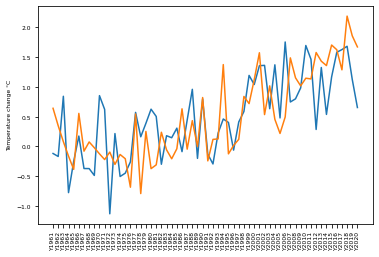

<Figure size 7200x7200 with 0 Axes>

In [107]:
plt.plot(df_Temperature_change_year.loc['Afghanistan'], label='Afghanistan')
plt.plot(df_Temperature_change_year.loc['Albania'], label='Albania')
plt.ylabel('Temperature change °C')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(rotation='vertical')
plt.figure(figsize=(100, 100))
# Pad margins so that markers don't get clipped by the axes
plt.show()

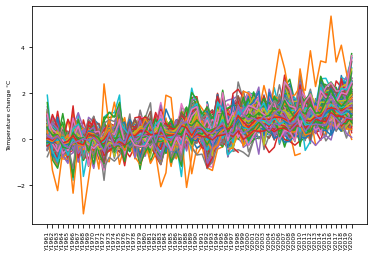

<Figure size 7200x7200 with 0 Axes>

In [117]:
for row in df_Temperature_change_year.iterrows():
  plt.plot(df_Temperature_change_year.loc[row[0]], label=row[0])

plt.ylabel('Temperature change °C')
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks(rotation='vertical')
plt.figure(figsize=(100, 100))
# Pad margins so that markers don't get clipped by the axes
plt.show()